<b><em>Authors:</em></b><br>
Eduardo Paz<br>
Asmaa Abdul-Amin<br>
Parker Link<br>
Ahmed Sachit <br>
Alhassane Moulaye<br>


<h1 style="text-align: center;font-size: 31pt;">CMSC206: Data Analysis Project</h1>

In this section, I will import the necessary libraries to download and analyze stock price data for aerospace and defense stocks. I have prefiltered the dataset to focus on financially strong stocks with positive momentum and liquidity. This was done by selecting stocks trading above their 20-day Simple Moving Average (SMA). The Aerospace and Defense Industry capitalizes on government contracts and defense spending.

In our analysis we can check for rising volume which indicates growing investor interest. To further develop this project we can also integrate Feature Engineering, Statistical analysis, and  machine learning models to predict future stock prices.


If you guys are interested, I have a working model that utilizes quantum computing techniques to generate an optimal portfolio of five stocks based on a similar data extraction. Then it comapres the quantum generated model to a classicaly generated model... let me know what you guys think or like what direction you all would like to see this project go in. Im open to any suggestions or ideas you may have.


Below is the full list of aerospace and defense stocks used in this analysis:<br>
Dataset 1:  https://drive.google.com/file/d/1_09iFs0UXSXsCOPHFC1H67xQpjdpc1TL/view?usp=sharing<br>
Dataset 2:  https://drive.google.com/file/d/1AmsQ95PffFlcoCkINd8iCxmLYdT1yIQJ/view?usp=sharing

In [2]:

import re
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use("dark_background")

In [3]:
# Define the expected file path
#file_name = "https://drive.google.com/uc?export=download&id=1Kyky0DRWqLz3JCrPip2r9rzwBYMCozrK"
file_name = "https://drive.google.com/uc?export=download&id=1AmsQ95PffFlcoCkINd8iCxmLYdT1yIQJ"
# Load stock symbols from Google Sheets
df = pd.read_csv(file_name)
print(df)



   Symbol                                        Description  \
0   ATROB                                    Astronics Corp.   
1   DUAVF                                  DASSAULT AVIATION   
2   QNTQY                                 Qinetiq Group Plc.   
3   NSKFF                              Kongsberg Gruppen ASA   
4   SAABF                                            Saab AB   
..    ...                                                ...   
57  POWWP  AMMO, Inc. - 8.75% Series A Cumulative Redeema...   
58  LDDFF                      Liberty Defense Holdings Ltd.   
59  SGGKY            Singapore Technologies Engineering Ltd.   
60  AETHF                    Aether Global Innovations Corp.   
61  SGGKF            Singapore Technologies Engineering Ltd.   

               Industry      Price Price - Currency  Price Change % 1 day  \
0   Aerospace & defense   24.90000              USD              3.750000   
1   Aerospace & defense  326.01000              USD              2.518868   


In [4]:
# Ensure 'Symbol' column exists
if 'Symbol' not in df.columns:
    raise ValueError("CSV file must contain a 'Symbol' column.")

# Extract symbols
symbols = df["Symbol"].dropna().tolist()
symbols

['ATROB',
 'DUAVF',
 'QNTQY',
 'NSKFF',
 'SAABF',
 'QNTQF',
 'HNSDF',
 'FINMF',
 'CMGMY',
 'CZGZF',
 'FINMY',
 'KWHIY',
 'SAABY',
 'MHVYF',
 'BAESF',
 'HAGHY',
 'CMGMF',
 'MHVIY',
 'ATRO',
 'ESLT',
 'THLLY',
 'THLEF',
 'RYCEY',
 'KBGGY',
 'GGRGF',
 'RNMBY',
 'BAESY',
 'OPST',
 'YRLLF',
 'DRSHF',
 'EADSY',
 'MTUAY',
 'MNDP',
 'BYPLF',
 'GE',
 'ERJ',
 'KTOS',
 'HWM',
 'CDRE',
 'AIR',
 'HEI.A',
 'GD',
 'RNMBF',
 'NOC',
 'RTX',
 'HII',
 'SAFRY',
 'MAXQF',
 'HEI',
 'RYCEF',
 'EADSF',
 'MTUAF',
 'SATL',
 'RLLCF',
 'HWM/P',
 'SAFRF',
 'TGI',
 'POWWP',
 'LDDFF',
 'SGGKY',
 'AETHF',
 'SGGKF']

In [7]:
tickers = symbols
# Filter tickers that do NOT have special characters
filtered_tickers = [ticker for ticker in symbols if re.match(r'^[A-Z0-9]+$', ticker)]
tickers = filtered_tickers

In [10]:
ohlc = yf.download(tickers, period="max").loc["1990":]
ohlc.to_csv("data/prices.csv")
print(ohlc)

[*********************100%***********************]  60 of 60 completed


Price        Close                                                         \
Ticker       AETHF        AIR       ATRO      ATROB      BAESF      BAESY   
Date                                                                        
1990-01-02     NaN  15.622686   0.061025        NaN        NaN        NaN   
1990-01-03     NaN  15.731187   0.061025        NaN        NaN        NaN   
1990-01-04     NaN  15.405713   0.066746        NaN        NaN        NaN   
1990-01-05     NaN  15.568447   0.066746        NaN        NaN        NaN   
1990-01-08     NaN  15.297215   0.074374        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
2025-03-31  0.0056  55.990002  24.170000  26.400000  20.180000  82.230003   
2025-04-01  0.0055  55.369999  24.730000  26.400000  20.410000  82.970001   
2025-04-02  0.0130  57.610001  24.620001  26.400000  20.350000  82.769997   
2025-04-03  0.0130  53.580002  23.750000  23.600000  21.299999  85.519997   

In [40]:
prices = ohlc["Close"].dropna(how="all")

prices.tail() # prints the last 5 rows

Ticker,AETHF,AIR,ATRO,ATROB,BAESF,BAESY,BYPLF,CDRE,CMGMF,CMGMY,...,SAABY,SAFRF,SAFRY,SATL,SGGKF,SGGKY,TGI,THLEF,THLLY,YRLLF
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-31,0.0056,55.990002,24.170000,26.400000,20.180000,82.230003,8.4000,29.610001,4.85,4.860,...,19.670000,261.160004,66.220001,3.570,5.1,50.500000,25.340000,266.029999,53.375000,0.27
2025-04-01,0.0055,55.369999,24.730000,26.400000,20.410000,82.970001,8.4000,29.290001,4.85,4.870,...,20.139999,262.309998,66.300003,3.590,5.1,50.930000,25.490000,266.029999,53.919998,0.27
2025-04-02,0.0130,57.610001,24.620001,26.400000,20.350000,82.769997,8.4000,30.379999,5.11,5.300,...,19.520000,263.880005,66.330002,3.620,5.1,49.150002,25.530001,266.029999,53.459999,0.27
2025-04-03,0.0130,53.580002,23.750000,23.600000,21.299999,85.519997,8.4000,28.730000,5.11,5.500,...,20.870001,256.799988,64.639999,3.285,5.1,49.150002,25.309999,270.500000,55.645000,0.27
2025-04-04,0.0090,50.080002,22.320000,22.889999,19.410000,78.000000,6.8399,28.170000,5.11,5.035,...,18.500000,240.970001,59.279999,3.380,5.1,49.150002,25.090000,264.250000,51.360001,0.27


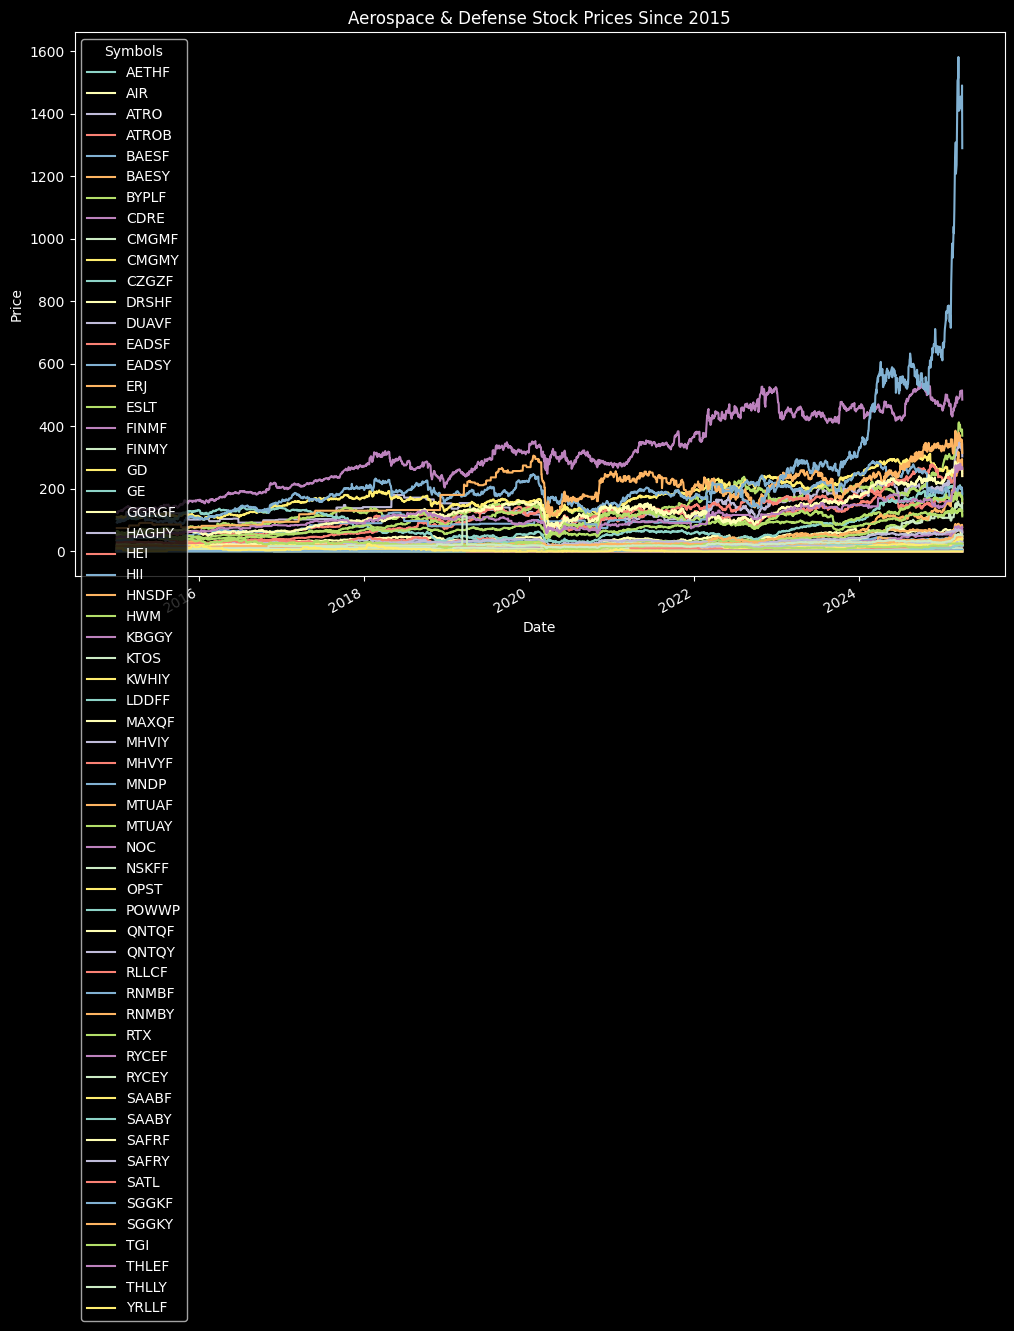

In [41]:
# Plot the stock close prices since 2015
prices[prices.index >= "2015-01-01"].plot(figsize=(12,8))

plt.title("Aerospace & Defense Stock Prices Since 2015")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(title="Symbols")

Stocks with expected returns > 0.1:
Ticker
ATRO    0.182331
ESLT    0.141995
GD      0.149344
HEI     0.214243
NOC     0.151901
RTX     0.122776
dtype: float64


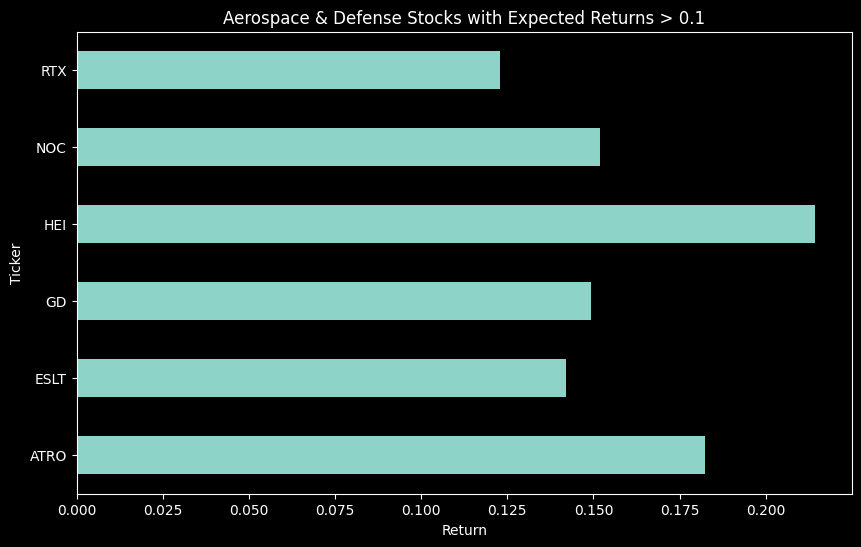

In [42]:
from pypfopt import expected_returns

# Drop tickers with too many NaNs (adjust threshold if needed)
prices_cleaned = prices.dropna(axis=1, thresh=int(0.8 * len(prices)))

# Forward-fill missing values (for small gaps)
prices_cleaned = prices_cleaned.ffill().bfill()

# Re-run expected returns calculation
mu = expected_returns.capm_return(prices_cleaned)

# Calculate expected returns (mean historical, but CAPM works similarly)
mu_mean = expected_returns.mean_historical_return(prices_cleaned)

# Filter stocks with expected return > 0.1
positive_returns = mu_mean[mu_mean > 0.1]

# Display filtered tickers
print("Stocks with expected returns > 0.1:")
print(positive_returns)

# Optional: Plot them
import matplotlib.pyplot as plt

positive_returns.plot.barh(figsize=(10, 6))
plt.title("Aerospace & Defense Stocks with Expected Returns > 0.1")
plt.xlabel("Return")
plt.ylabel("Ticker")
plt.show()


Stocks with expected returns > 0.05:
Ticker
ATRO     0.182331
ATROB    0.067059
BAESY    0.079570
EADSF    0.068179
EADSY    0.052493
ESLT     0.141995
GD       0.149344
GE       0.079192
HEI      0.214243
HII      0.052549
HWM      0.053099
MTUAY    0.057129
NOC      0.151901
NSKFF    0.169487
RLLCF    0.105251
RNMBF    0.099941
RNMBY    0.108942
RTX      0.122776
SAABF    0.115241
SAFRF    0.069106
SAFRY    0.077543
THLEF    0.059277
THLLY    0.061261
dtype: float64


Text(0, 0.5, 'Ticker')

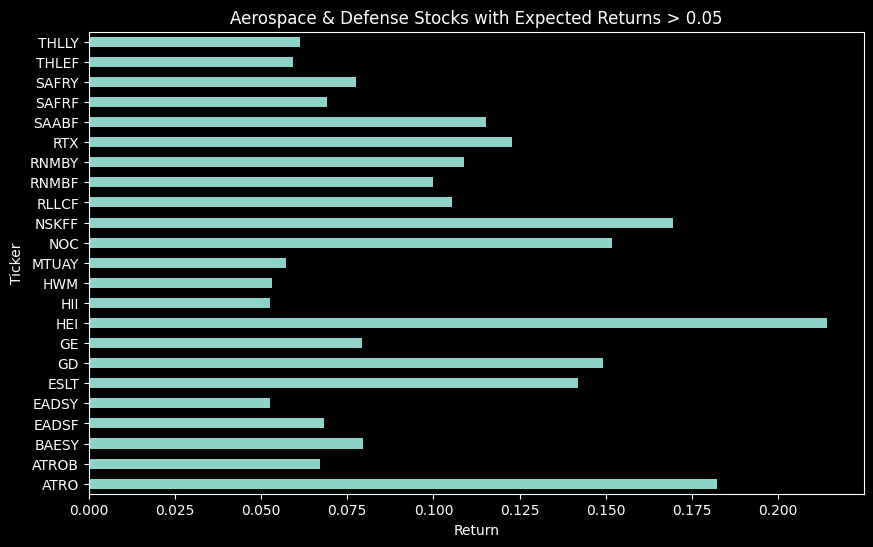

In [24]:
# Additional Analysis...

prices = prices.ffill().bfill()
mu_mean_dirty = expected_returns.mean_historical_return(prices) # Dirty because I just ffilled and bfilled NaNs instead of removing them

# Filter stocks with expected return > 0.05
positive_returns_dirty = mu_mean_dirty[mu_mean_dirty > 0.05]

# Display filtered tickers
print("Stocks with expected returns > 0.05:")
print(positive_returns_dirty)

# Optional: Plot them
import matplotlib.pyplot as plt

positive_returns_dirty.plot.barh(figsize=(10, 6))
plt.title("Aerospace & Defense Stocks with Expected Returns > 0.05")
plt.xlabel("Return")
plt.ylabel("Ticker")

## Can we predict short-term stock price direction (up/down) using technical indicators as input features? 

NameError: name 'Close' is not defined

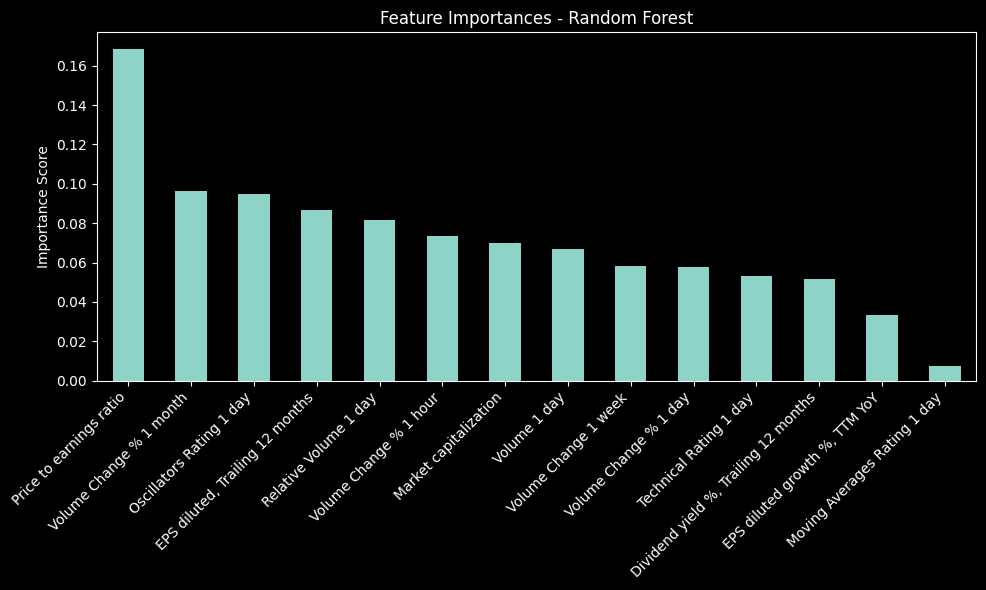

In [46]:
# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances - Random Forest")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



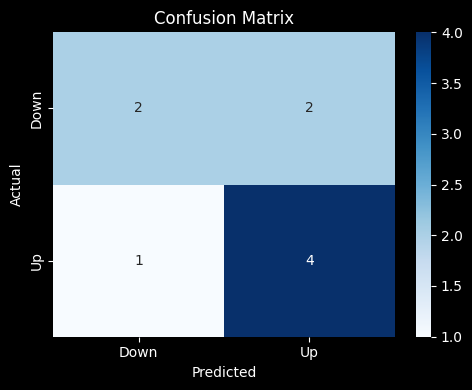

In [47]:
# Plot confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [48]:
!pip install ta

In [57]:
df_prices = pd.read_csv("data/prices.csv", parse_dates=["Date"], index_col="Date")

# Show basic structure
df_prices.info(), df_prices.head()

# Step 1: Extract header row (tickers) and set as column names
new_header = df_prices_raw.iloc[0, 1:].tolist()  # Tickers from row 0 (excluding 'Price')
new_header.insert(0, "Date")  # Add 'Date' back as the first column

# Step 2: Extract data starting from row 2
df_prices_cleaned = df_prices_raw.iloc[2:].copy()
df_prices_cleaned.columns = new_header

# Step 3: Parse dates and set index
df_prices_cleaned["Date"] = pd.to_datetime(df_prices_cleaned["Date"], errors="coerce")
df_prices_cleaned.set_index("Date", inplace=True)

# Step 4: Convert price values to numeric (ignore non-numeric)
df_prices_cleaned = df_prices_cleaned.apply(pd.to_numeric, errors='coerce')

# Preview cleaned structure
df_prices_cleaned.info(), df_prices_cleaned.tail()

# Check if 'HEI' is available in the dataset
ticker = 'HEI'
if ticker not in df_prices_cleaned.columns:
    available = df_prices_cleaned.columns.tolist()
    raise ValueError(f"Ticker '{ticker}' not found in the dataset. Available tickers: {available[:10]}...")

# Extract HEI price series
hei_prices = df_prices_cleaned[ticker].dropna()

# Display basic info and last few rows
hei_prices.info(), hei_prices.tail()

ValueError: Missing column provided to 'parse_dates': 'Date'